# Phys 311 dielectric interface lab report

Here is the python package I used for this lab report:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

1. Calucalte the angle of incidence $\theta$ = 180 $^\circ$ - $\beta$ /2

In [38]:
df = pd.read_csv('Dielectirc_interface.csv')
df["theta"] = 180 - df["deg"] / 2
print(df["theta"])


0     20.0
1     25.0
2     30.0
3     35.0
4     40.0
5     45.0
6     50.0
7     55.0
8     60.0
9     65.0
10    70.0
11    75.0
12    80.0
13    90.0
Name: theta, dtype: float64


2. Divide each measurement by its reference measurement. Answers are unitless.

In [43]:
for col in df:
    if col[2] == "i":
        df["{}{}".format(col[0:2],"_rf_ratio")] = df["{}{}".format(col[0:2],"o")]/df[col]
df1 = df.iloc[:,9:] 
print(df1)

    theta  ru_rf_ratio  rd_rf_ratio  gu_rf_ratio  gd_rf_ratio
0    20.0     0.005687     0.008347     0.006543     0.009524
1    25.0     0.005052     0.009189     0.005875     0.010476
2    30.0     0.004301     0.010161     0.005125     0.011667
3    35.0     0.003438     0.011657     0.004000     0.013333
4    40.0     0.002495     0.013686     0.003000     0.015476
5    45.0     0.001492     0.016414     0.001772     0.018675
6    50.0     0.000633     0.019655     0.000886     0.021687
7    55.0     0.000064     0.024056     0.000127     0.027831
8    60.0     0.000297     0.031111     0.000380     0.035610
9    65.0     0.002076     0.040123     0.002532     0.045732
10   70.0     0.006872     0.052156     0.007949     0.059634
11   75.0     0.017304     0.069855     0.020128     0.079024
12   80.0     0.038806     0.093546     0.044744     0.107407
13   90.0     0.164083     0.417787     0.150542     0.156430


3. Divide the each point with reference 90 $^\circ$ measurement. normalized reflectance at each angle to its value at 90 $^\circ$

In [66]:
for col in df1:
    if col[-1] == "o":
        new_col = "{}{}".format(col[0:2],"_nor_rf")
        df1[new_col] = df1[col].divide(df1.iloc[-1][col])
df2 = df1.iloc[:,5:]
print(df2)
        

    ru_nor_rf  rd_nor_rf  gu_nor_rf  gd_nor_rf
0    0.034662   0.019979   0.043464   0.060882
1    0.030789   0.021994   0.039026   0.066970
2    0.026210   0.024320   0.034044   0.074581
3    0.020950   0.027901   0.026571   0.085235
4    0.015204   0.032759   0.019928   0.098934
5    0.009090   0.039288   0.011772   0.119381
6    0.003857   0.047046   0.005886   0.138636
7    0.000387   0.057580   0.000841   0.177916
8    0.001808   0.074466   0.002523   0.227640
9    0.012654   0.096038   0.016817   0.292346
10   0.041883   0.124839   0.052801   0.381220
11   0.105456   0.167202   0.133705   0.505174
12   0.236502   0.223909   0.297217   0.686617
13   1.000000   1.000000   1.000000   1.000000


4. Ploting of reflectance against the angle.

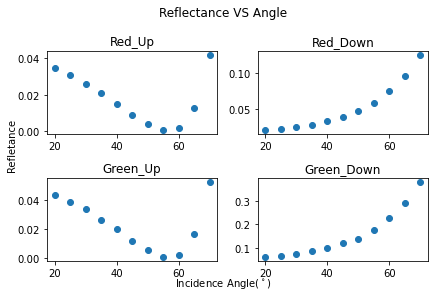

<Figure size 12000x6000 with 0 Axes>

In [98]:
df3 = df1.iloc[:-3] # eliminate 90 degree data set

# set up ploting figure
fig, axs = plt.subplots(2, 2)
plt.figure(figsize=(10,5), dpi=1200)
fig.suptitle("Reflectance VS Angle")
fig.text(0.5, 0.01, 'Incidence Angle($^\circ$)', ha='center')
fig.text(0.001, 0.5, 'Refletance', va='center', rotation='vertical')

axs[0,0].scatter(df3["theta"], df3["ru_nor_rf"])
axs[0,0].set_title("Red_Up")
axs[0,1].scatter(df3["theta"], df3["rd_nor_rf"])
axs[0,1].set_title("Red_Down")
axs[1,0].scatter(df3["theta"], df3["gu_nor_rf"])
axs[1,0].set_title("Green_Up")
axs[1,1].scatter(df3["theta"], df3["gd_nor_rf"])
axs[1,1].set_title("Green_Down")
fig.tight_layout()

fig.savefig('fig.png', bbox_inches = 'tight', dpi=1000)

5. Find fiting fresnel equation

In [ ]:
def fresnel_pd_eq(th, n, mul, c):
    """
    Fresnel equation for perpendicular polarization, with input of th for incident angle theta,
    n for index of reflectance, mul for multiplyer, c for constant to add to the function.
    """
    num = math.cos(th) - math.sqrt(n**2 - math.sin(th)**2)
    den = math.cos(th) + math.sqrt(n**2 - math.sin(th)**2)
    return((num/den)**2)*mul + c


